In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
%matplotlib inline
import random
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('Clean.csv')
data = data.drop(['Unnamed: 0','currency','ship_class','is_ip_blacklisted', 'is_email_blacklisted'],axis=1)

In [4]:
rindex =  np.array(random.sample(range(5000,100000), 5000))
dt = data[data['is_fraud']==0]
data_nf_sample = dt.ix[rindex]
data_fr = data[data['is_fraud']==1]

In [5]:
data[data['is_fraud']==0]['email_username_length'].mean()

10.122863157894736

In [6]:
data[data['is_fraud']==1]['email_username_length'].mean()

10.4068

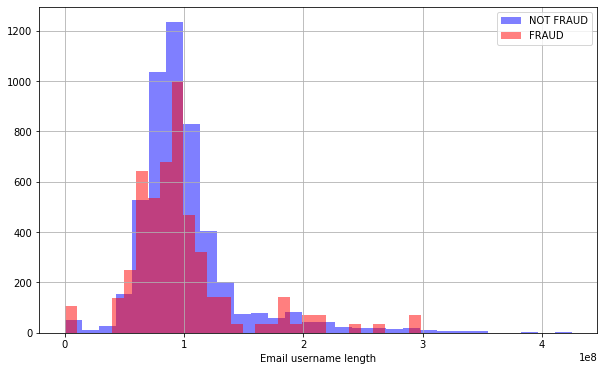

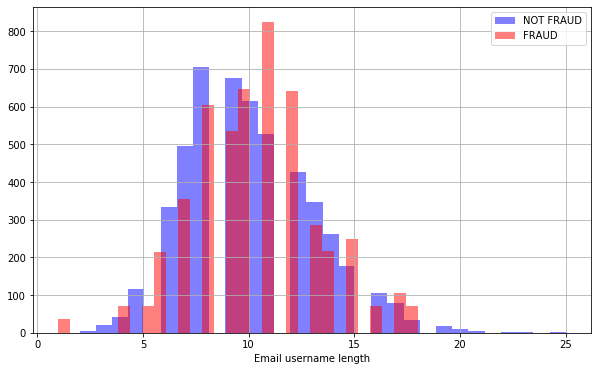

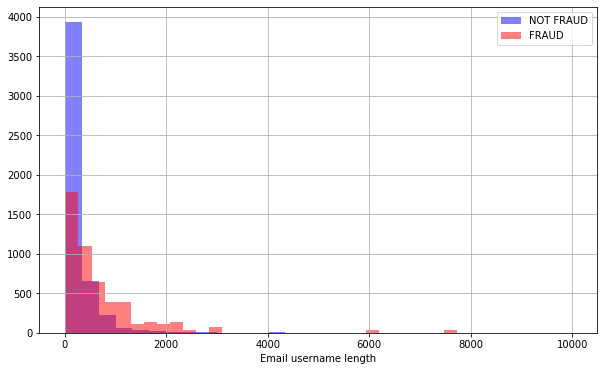

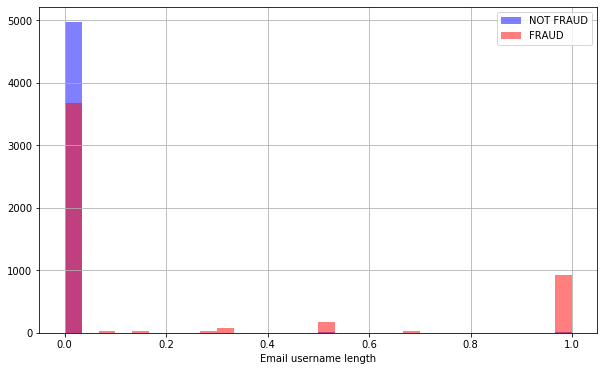

In [7]:
ls = ['age_of_account','email_username_length','order_total','product_blacklist_percent']
for col in ls:
    plt.figure(figsize=(10,6))
    data_nf_sample[col].hist(alpha=0.5,bins=30,color='blue',label='NOT FRAUD')
    data_fr[col].hist(alpha=0.5,bins=30,color='red',label='FRAUD')
    plt.legend()
    plt.xlabel('Email username length')

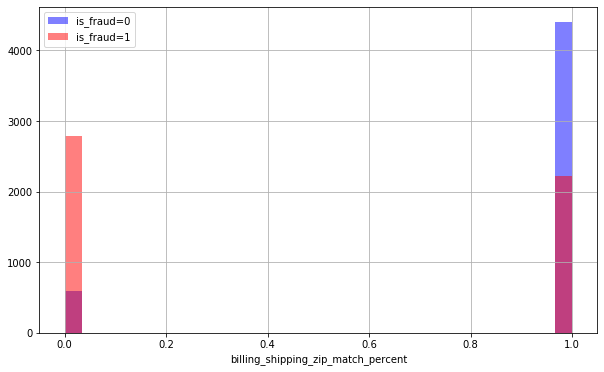

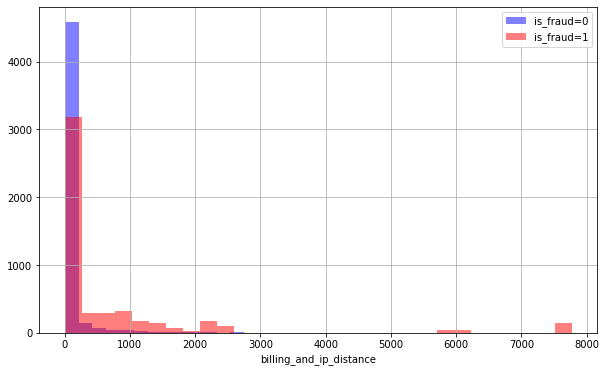

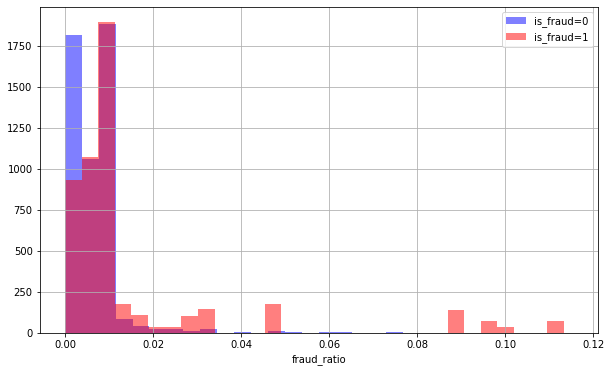

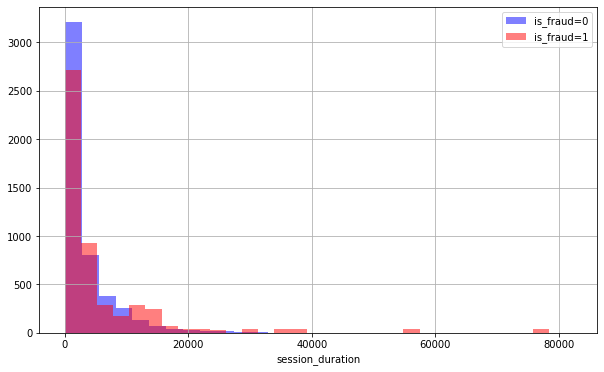

In [8]:
ls = ['billing_shipping_zip_match_percent','billing_and_ip_distance','fraud_ratio','session_duration']
# plt.xlim(0,50)
# plt.ylim(0,6000)
for col in ls:
    
    plt.figure(figsize=(10,6))
    data_nf_sample[col].hist(alpha=0.5,bins=30,color='blue',label='is_fraud=0')
    data_fr[col].hist(alpha=0.5,bins=30,color='red',label='is_fraud=1')
    plt.legend()
    plt.xlabel(col)

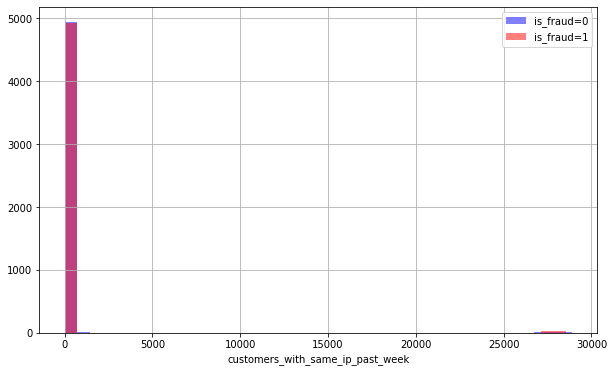

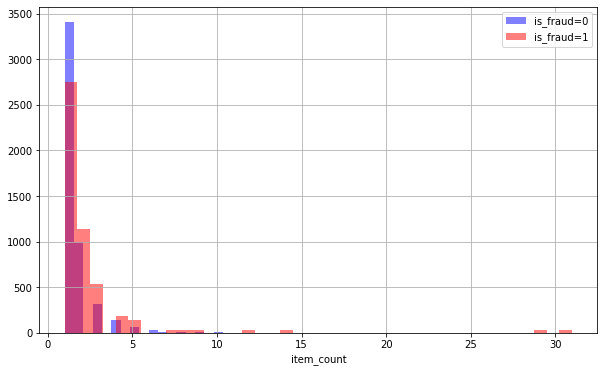

In [9]:
ls = ['customers_with_same_ip_past_week','item_count']

for col in ls:
    plt.figure(figsize=(10,6))
    data_nf_sample[col].hist(alpha=0.5,bins=40,color='blue',label='is_fraud=0')
    data_fr[col].hist(alpha=0.5,bins=40,color='red',label='is_fraud=1')
    plt.legend()
    plt.xlabel(col)

In [10]:
data2 = pd.concat([data_nf_sample,data_fr])

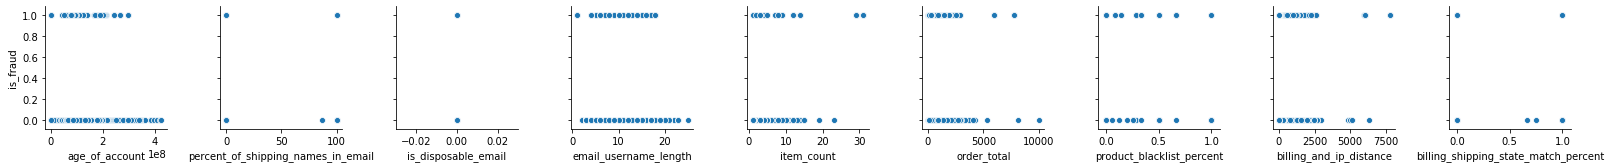

In [11]:
sns.pairplot(data=data2, 
                  y_vars=['is_fraud'],
                  x_vars=['age_of_account', 'percent_of_shipping_names_in_email','is_disposable_email','email_username_length', 'item_count',
'order_total','product_blacklist_percent', 'billing_and_ip_distance','billing_shipping_state_match_percent'  ])

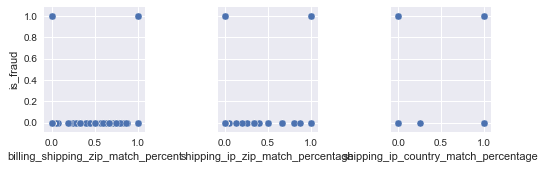

In [39]:
sns.pairplot(data=data, 
                  y_vars=['is_fraud'],
                  x_vars=['billing_shipping_zip_match_percent', 'shipping_ip_zip_match_percentage','shipping_ip_country_match_percentage'] )

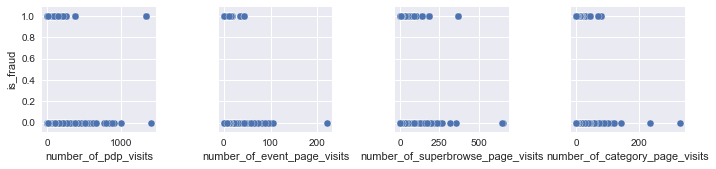

In [42]:
sns.pairplot(data=data2, 
                  y_vars=['is_fraud'],
                  x_vars=data.columns[22:26])

In [43]:
colname = data.columns[22:26]
colname

Index(['number_of_pdp_visits', 'number_of_event_page_visits',
       'number_of_superbrowse_page_visits', 'number_of_category_page_visits'],
      dtype='object')

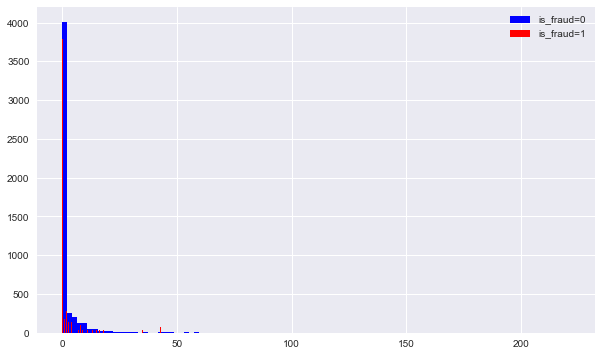

In [57]:
plt.figure(figsize=(10,6))
#plt.xlim(2,60)
# plt.ylim(0,6000)
data_nf_sample['number_of_event_page_visits'].hist(bins=100,color='blue',label='is_fraud=0')
data_fr['number_of_event_page_visits'].hist(bins=100,color='red',label='is_fraud=1')
plt.legend()

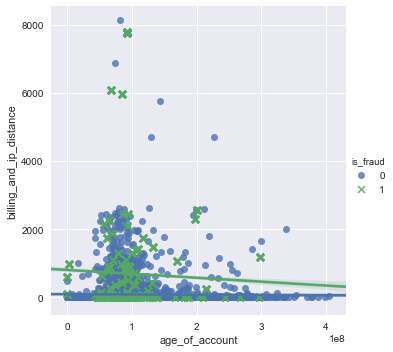

In [29]:
sns.lmplot(y='billing_and_ip_distance',x='age_of_account',data=data2,hue='is_fraud',markers=["o", "x"])

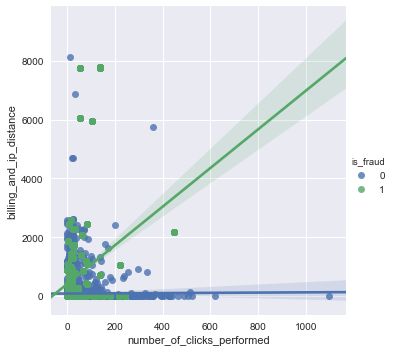

In [33]:
sns.lmplot(y='billing_and_ip_distance',x='number_of_clicks_performed',data=data2,hue='is_fraud')

In [36]:
rindex2 =  np.array(random.sample(range(5000,100000), 500))
rindex3 =  np.array(random.sample(range(0,5000), 500))


data_nf_sample2 = data.ix[rindex2]
data_fr2 = data.ix[rindex3]
data3 = pd.concat([data_nf_sample2,data_fr2])

(-10, 200)

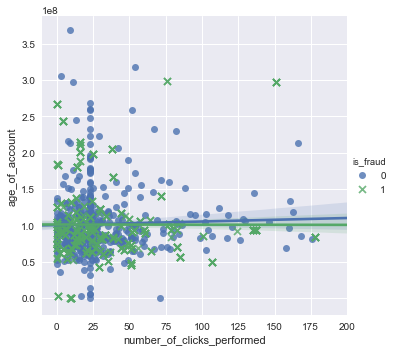

In [90]:
#plt.figure(figsize=(10,6))
sns.lmplot(y='age_of_account',x='number_of_clicks_performed',data=data3,hue='is_fraud',markers=["o", "x"])
plt.xlim(-10,200)
#plt.ylim(-90,3000)

(-90, 3000)

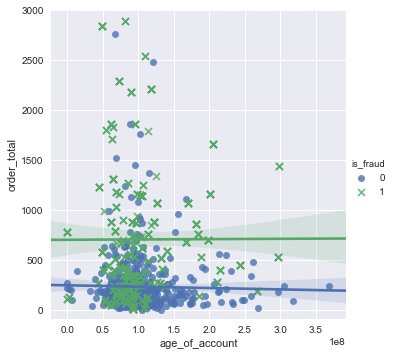

In [122]:
sns.lmplot(y='order_total',x='age_of_account',data=data3,hue='is_fraud',markers=["o", "x"])
#plt.xlim(-10,200)
plt.ylim(-90,3000)

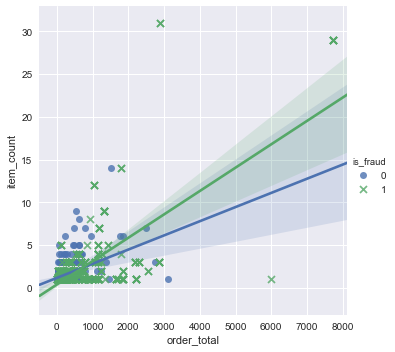

In [97]:
sns.lmplot(y='item_count',x='order_total',data=data3,hue='is_fraud',markers=["o", "x"])
#plt.xlim(-10,400)
#plt.ylim(-1,15)

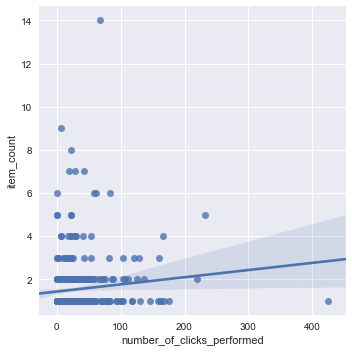

In [93]:
sns.lmplot(y='item_count',x='number_of_clicks_performed',data=data_nf_sample2)

In [77]:
(data['customers_with_same_ip_past_week']>1.0).sum()

8280

In [82]:
data[data['customers_with_same_ip_past_week']>1.0]['is_fraud']

0.0821256038647343

In [ ]:
ls = ['customers_with_same_ip_past_week']

for col in ls:
    plt.figure(figsize=(10,6))
    data_nf_sample[col].hist(alpha=0.5,bins=40,color='blue',label='is_fraud=0')
    data_fr[col].hist(alpha=0.5,bins=40,color='red',label='is_fraud=1')
    plt.legend()
    plt.xlabel(col)

In [ ]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')